In [11]:
import numpy as np
import scipy.optimize
import scipy.interpolate
import matplotlib.pyplot as plt

### **Table of Content**

* Some math regarding optimizaitons and coding libraries
* Interpolations, Curve Fitting. 
* Curve Fitting with Optimizaitons

### **Interpolations**

* We want more data points but there are not enough data points! And that is the reasons for us to interpolate. 
* Actually, Why are we only studying 1d data? 

**Function we are using for Python**

[`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) 

**Python Function Accepts**: 
(x, y, kind=?) <- These are the important parameters. 

* x: 1d array of data. 
* y: 1d array of data, for this class
* kind: A string naming the method used for the interpolations. There are a lot "‘linear’, ‘nearest’, ‘nearest-up’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘previous’, or ‘next’. ‘zero’, ‘slinear’, ‘quadratic’ and ‘cubic’ "


Note: Where, x and y has matching sizes, x is strictly a 1d array, and y has matching length in the axis of interpolation. (By default it's axis -1, the last fiber of the tensor)(Don't worry about it just make your y 1d as well and it will work)

**Functionsd Returns**

It returns a function where you can quiry your value. This is some cool functional programming APIs. 

**Function we are using for MATLAB**

[`interp1`](https://www.mathworks.com/help/matlab/ref/interp1.html)

**MATLAB Function Accepts**

(x, v, xq, method)

* x: The data points, 1d. 
* v: The matched with each data points, 1d 
* xq: The finner points that we wish to quiry the interpolated function with. 

**Returns**: 
* An array where each element is matching values in xq with the function value at those points. 

**ToDo**: 

Verifies some types for the intput and output parameters together with student in class using the `type` function in python. And go through the matlab code as well. 



### **Curve Fitting**

**For both python and matlab**

`polyfit`, `polyval` are the functions we use. In python, it's under the numpy package. 

Python: [`polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html), [`polyval`](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html). 

Matlab: [`polyfit`](https://www.mathworks.com/help/matlab/ref/polyfit.html), [`polyval`](https://www.mathworks.com/help/matlab/ref/polyval.html)

Let's read the documentations together and find out all the differences. 





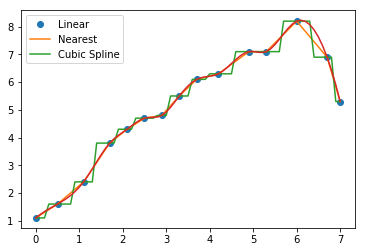

In [12]:
xp = np.arange(0,7.1,0.1)
x = [0.0, 0.5, 1.1, 1.7, 2.1, 2.5, 2.9, 3.3, 3.7, 4.2, 4.9, 5.3, 6.0, 6.7, 7.0]
y = [1.1, 1.6, 2.4, 3.8, 4.3, 4.7, 4.8, 5.5, 6.1, 6.3, 7.1, 7.1, 8.2, 6.9, 5.3]

f = scipy.interpolate.interp1d(x, y) 
LinearInterpolateEval = f(xp)
f2 = scipy.interpolate.interp1d(x, y,'nearest')
NearestInterpolateEval = f2(xp)
f3 = scipy.interpolate.CubicSpline(x, y)
SplineInterpolateEval = f3(xp)

plt.plot(
    x, 
    y,
    'o',
    xp,
    LinearInterpolateEval,
    xp,
    NearestInterpolateEval,
    xp,
    SplineInterpolateEval
)
plt.legend(["Linear", "Nearest", "Cubic Spline"])

Coefficients are: [0.83075702 2.13891403]


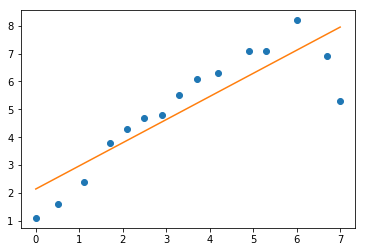

In [13]:
PolynomialCoefficients = np.polyfit(x ,y, 1)
print(f"Coefficients are: {PolynomialCoefficients}")  
xp = np.arange(0, 7.1, 0.1)

yp = np.polyval(PolynomialCoefficients, xp)

plt.plot(x, y, 'o')
plt.plot(xp, yp)

### **Optimizing Function Parameters**

For the context of the class this is what we aer doing.

$$
x^+ =  \argmin_{\theta} f(x| \theta) \quad \forall x \in \text{Data}
$$

Sometimes, the function with parameters are referred to as **model**, and sometimes it can even represent a neural network in the literature. 

But in general, optimization problem is phrased as: 

$$
x^+ \in \argmin_{x\in X} f(x)
$$

Where $x^{+}$ is referred to as the **minimizer**. and the function is called the **Objective Function**. 

And sometime we wish to look for the value of the function when it's smallest, then we say: 

$$
\min_{x\in X} f(x)
$$


When $x^+$, the optimal solution is unique, we replace $\in$ with $=$. 


Quoted From Michael, the other friendly TA: 

> #### Two pieces to work out:
> 
> 1. A domain of states to search over. Can be discrete, an interval, the real line, or
> much more complicated. Sometimes called the Feasible Region.
> 2. A function called the "objective function. It's what we want to optimize.
> Issues?
> 
> Note: The optimal solution may not exist or may not be unique. Mathematical analysis is
> needed to prove a unqiue optimal solution exists.

**Questions for you:**

* Why just min? Why not max? What if we want max instead? 


**NOTE**:

Optimizations is extremely rich, and it's the corner stone of Applied Mathematics and the discrete side of it becomes the fundations for modern computer science as well. Your TA wishes to get a PhD relevant to this field of study and it's studying them day and night without a break. 

If you want to learn more about it, whether using them for the industries you will work in for the future, or just find them interesting and wish to leverage it to stay in the academia a bit longer, here is a list of classes that is relevant: 


> Math 407/408/409
> 
> Math/Amath 514/515/516/518
> 
> EE 445/447/550/556/578
> 
> CSE 421/521/535/541
> 

### **The Error Functions**

For example, given $f$ to be a polynomial that evalutes at $x$, a singular points, and a set of data $\{(x_i, y_i)\}_{i=1}^n$. The error of the polynomial measured under 2 norm can be expressed as: 

$$
E(\theta) = \sqrt{
\frac{1}{n} \sum_{j = 1}^{n} (f(x_j| \theta) - y_j))^2
}
$$

Take note that, we want the error to reflects the average error and don't want it to scale with the number of data points, therefore the average of the squared difference is taken. This is called [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) (Mean Squared Error) in Statistics. 

For your Homework, you can use min square error, or the MSE from statistics, they are the same because the minimizer, for a function scaled by a positive number is the same. (Think through this). 


### Let's get to the code!

Firstly, read this documentations together. 

Python: [scipy.optimize.fimin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin.html) 

Matlab: [fminsearch](https://www.mathworks.com/help/matlab/ref/fminsearch.html)



In [14]:
def TheModel(x, params): 
    pass

"""
    Function credit to Michael, the other friendly TA. 
"""
def E2Error(params, model, xdata, ydata):
    pass



Let's fit the sin function using the sin functions, it should recover the parameters. 

Optimization terminated successfully.
         Current function value: 0.000011
         Iterations: 42
         Function evaluations: 81
[2.49998407 3.14159165]


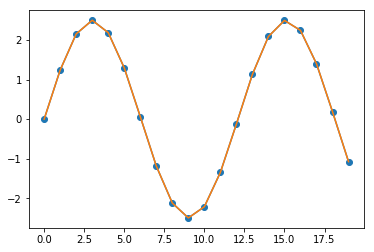

In [15]:
xData = np.linspace(0, np.pi, 20)
yData = 2.5*np.sin(np.pi*xData)

InitialGuess = [4, 2]  # Numpy array should still be ok. Initial guess should be close
Minimizer = scipy.optimize.fmin(
    lambda x: E2Error(x, TheModel, xData, yData),
    InitialGuess
    )

# What are the minimizer? 

print(Minimizer)
plt.plot(TheModel(xData, Minimizer), '-o')
plt.plot(yData)


Optimization terminated successfully.
         Current function value: 0.874696
         Iterations: 7325
         Function evaluations: 9155
[-3.38075191 -0.43093733  2.01798888  0.12872119  0.2484118  -0.0345202
 -0.2040557   0.42241657 -0.30538331  0.57367079 -0.18941888  1.03038177
 -1.01730148  0.72238692 -0.67137076  0.37057821 -0.20579923  0.28860627
 -0.30808739 -0.113697  ]


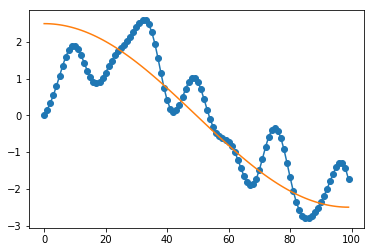

In [25]:
xData = np.linspace(0, np.pi, 100)
yData = 2.5*np.cos(xData)
FREQCOUNT = 20
InitialGuess = np.zeros(FREQCOUNT) # all frequencies are zero. 

def FittingWaves(x, params): 
    pass


Minimizer = scipy.optimize.fmin(
        lambda x: E2Error(x, FittingWaves, xData, yData),
        InitialGuess, 
        maxfun=10000
    )

    
print(Minimizer)
plt.plot(FittingWaves(xData, Minimizer), '-o')
plt.plot(yData)

